In [1]:
# 0. 라이브러리 로딩
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 1. 데이터 준비(화이트 와인 데이터)

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/4주/breast_cancer.csv").dropna()
print(df.head())

# label만 땜
X = df.drop("label", axis=1)
y = df["label"]

   Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst texture  worst perimeter  worst area  \
0         0.2419  ...          17.33     

In [3]:
# 2. 스케일링 (getdummy가 one-hot 인코딩, X도 numpy로)

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

In [4]:
# 3. 학습/테스트 분할

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [5]:
# 4. 모델 구성 (dense 수를 늘리던지, 드롭아웃 수 늘리던지)

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),   # 첫 번째 레이어에서 입력 모양 정의
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])

In [6]:
# 5. 모델 컴파일

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [7]:
# 6. 학습 (epoch 수 알아서 조절)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7081 - loss: 0.6292 - val_accuracy: 0.9451 - val_loss: 0.2579
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8999 - loss: 0.2608 - val_accuracy: 0.9670 - val_loss: 0.1403
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9304 - loss: 0.1932 - val_accuracy: 0.9890 - val_loss: 0.0968
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9446 - loss: 0.1201 - val_accuracy: 0.9890 - val_loss: 0.0742
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9584 - loss: 0.0916 - val_accuracy: 0.9890 - val_loss: 0.0618
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9746 - loss: 0.0829 - val_accuracy: 0.9780 - val_loss: 0.0579
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9809 - loss: 0.0787 - val_accuracy: 0.9780 - val_loss: 0.0531
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9820 - loss: 0.0730 - val_accuracy: 0.9780 - val

In [8]:
# 7. 예측

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


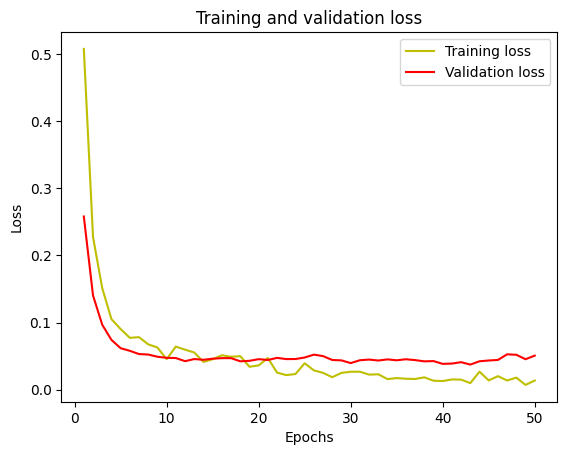

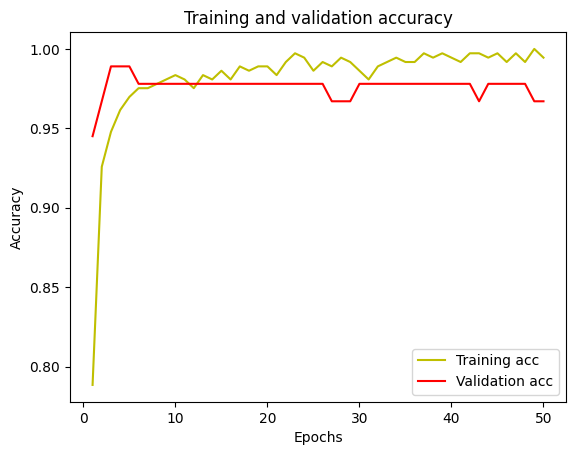

In [9]:
# 8. 학습 곡선 시각화

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 곡선 시각화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# 9. 분류 성능 평가

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[45  2]
 [ 2 65]]
